## KNN Assignment 

### Task 1: Data Analyze using visualizations

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv('Zoo.csv')

# Check for missing values
print(df.isnull().sum())



animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


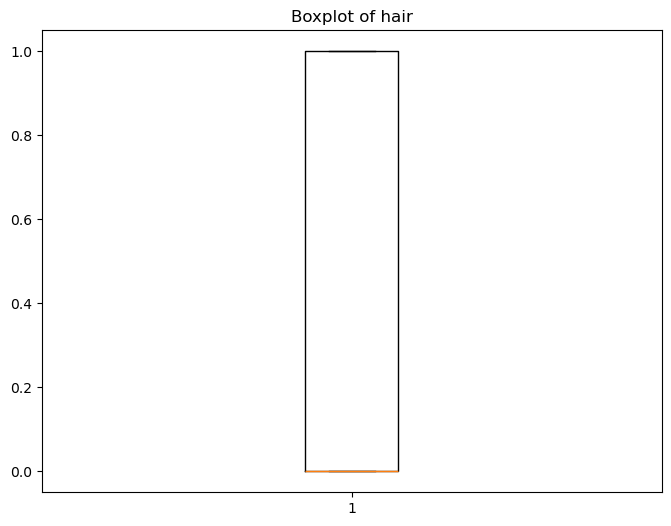

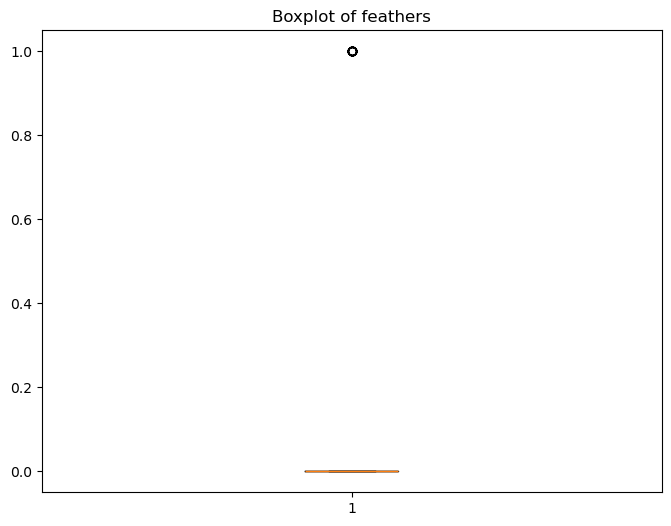

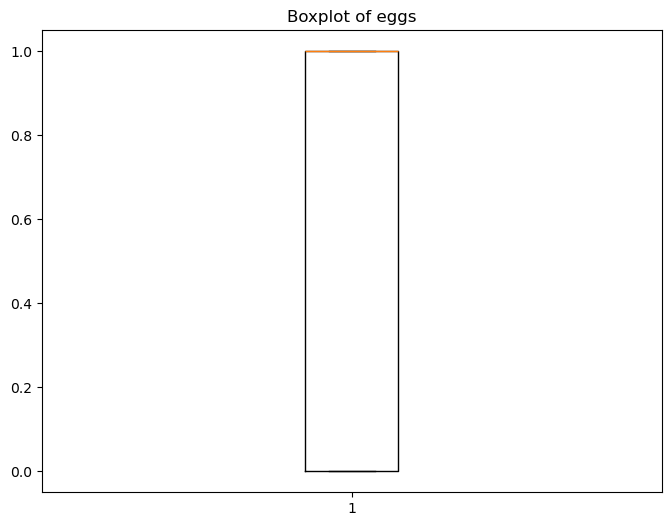

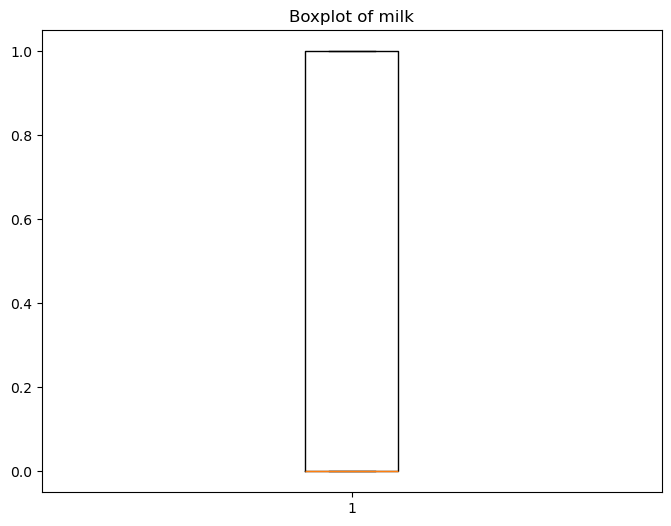

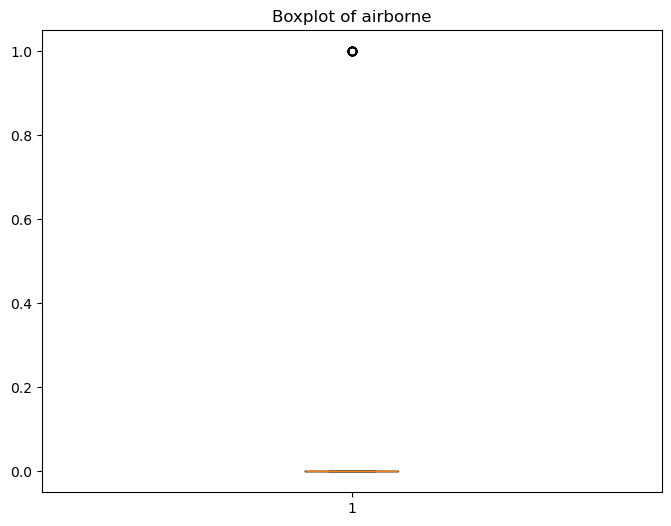

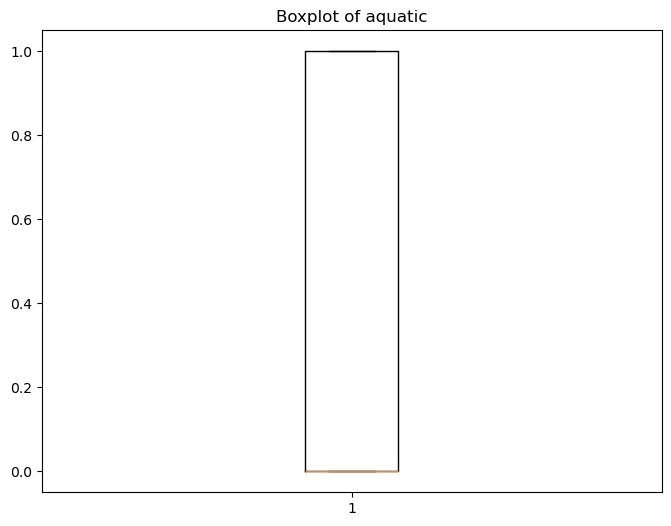

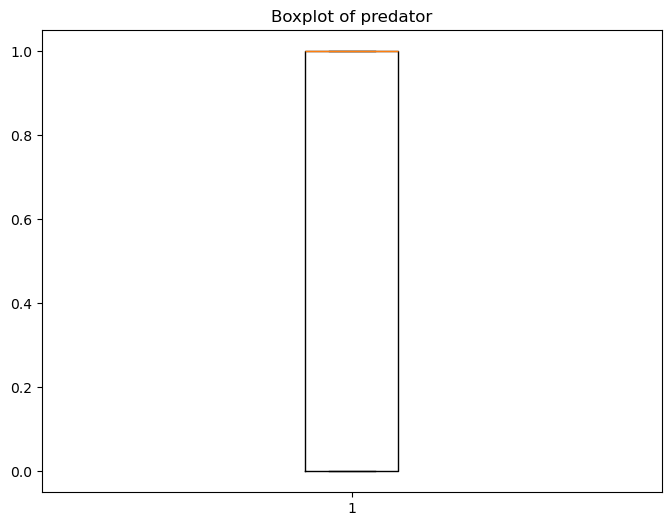

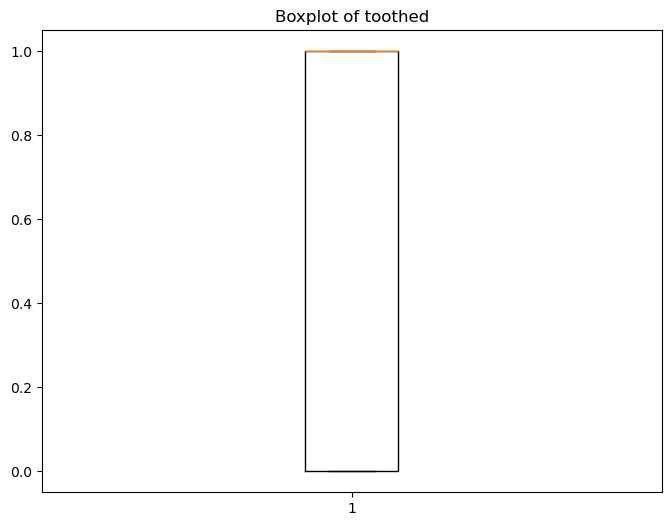

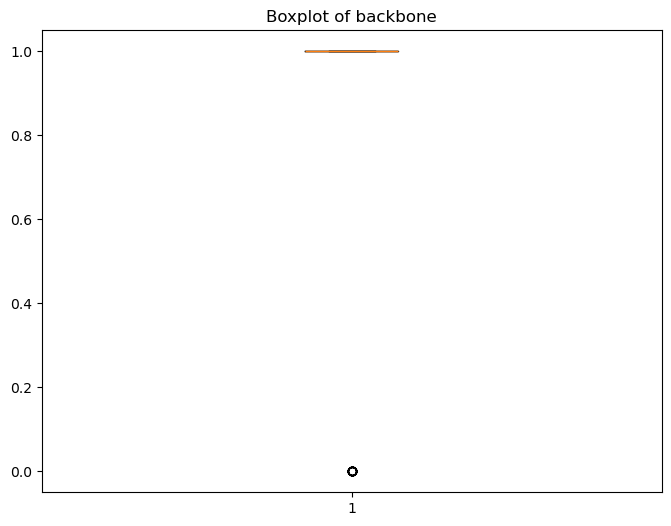

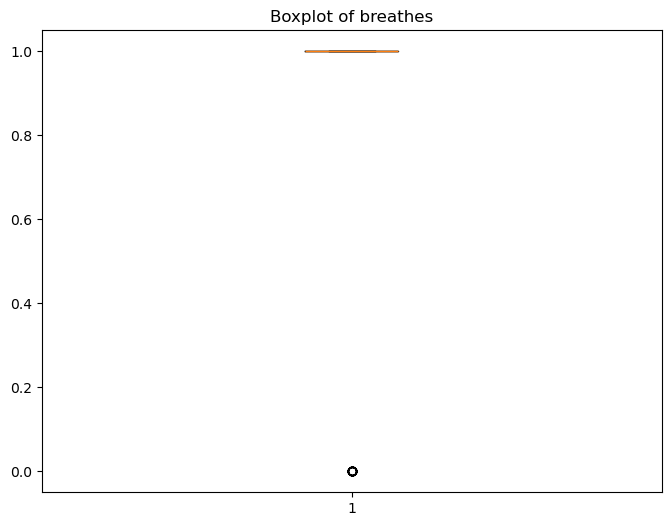

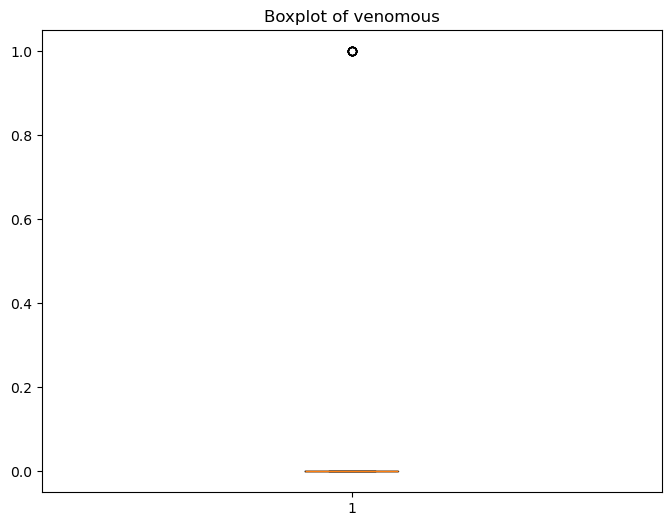

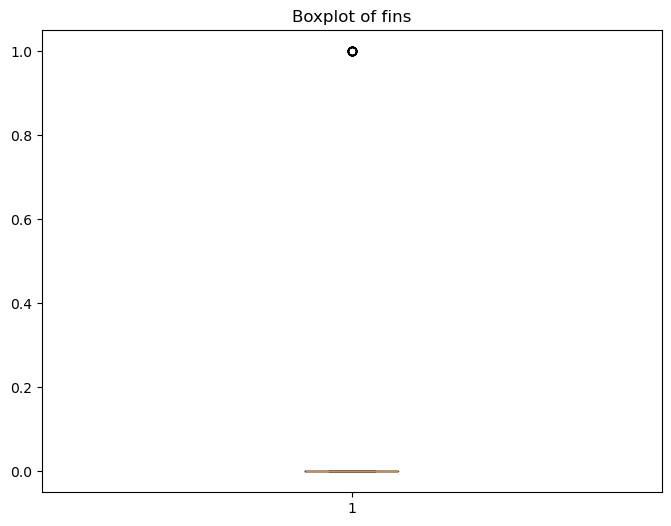

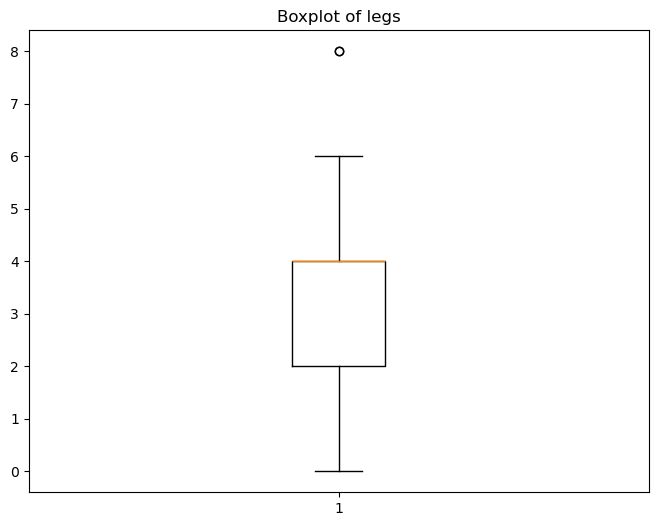

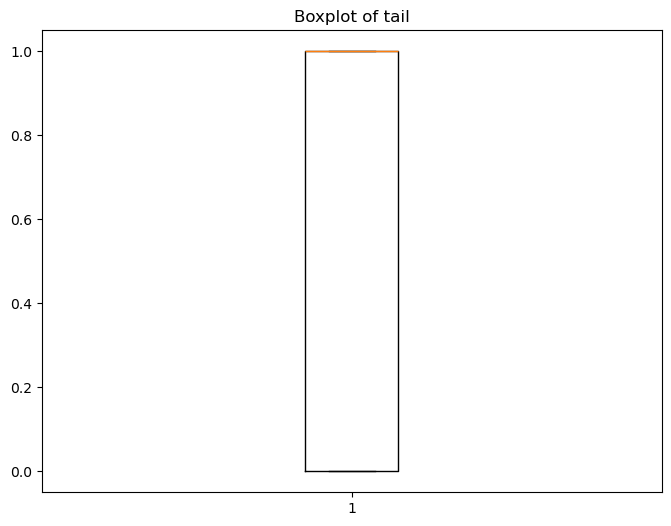

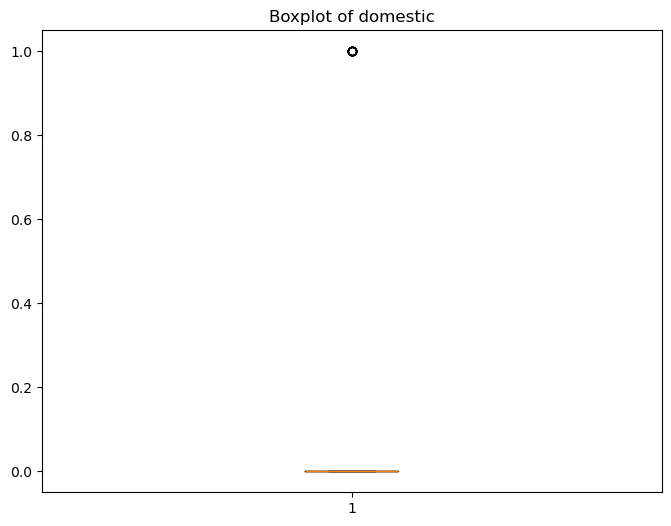

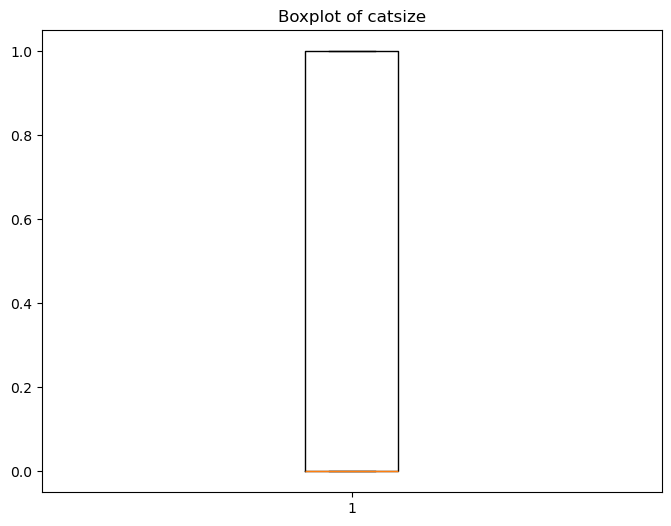

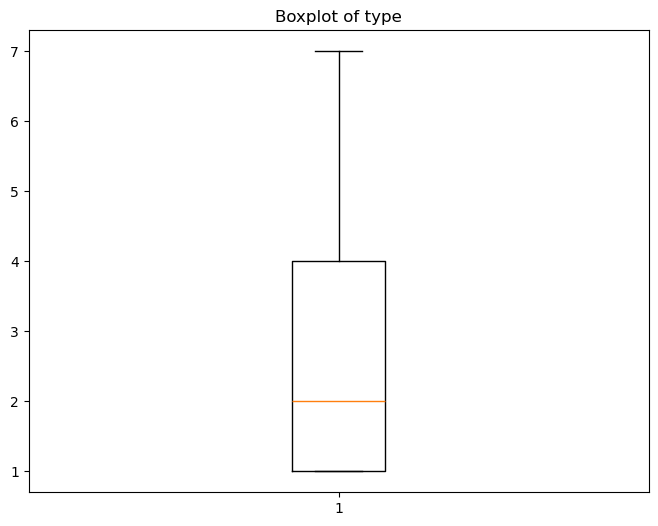

In [38]:

# Boxplot for outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

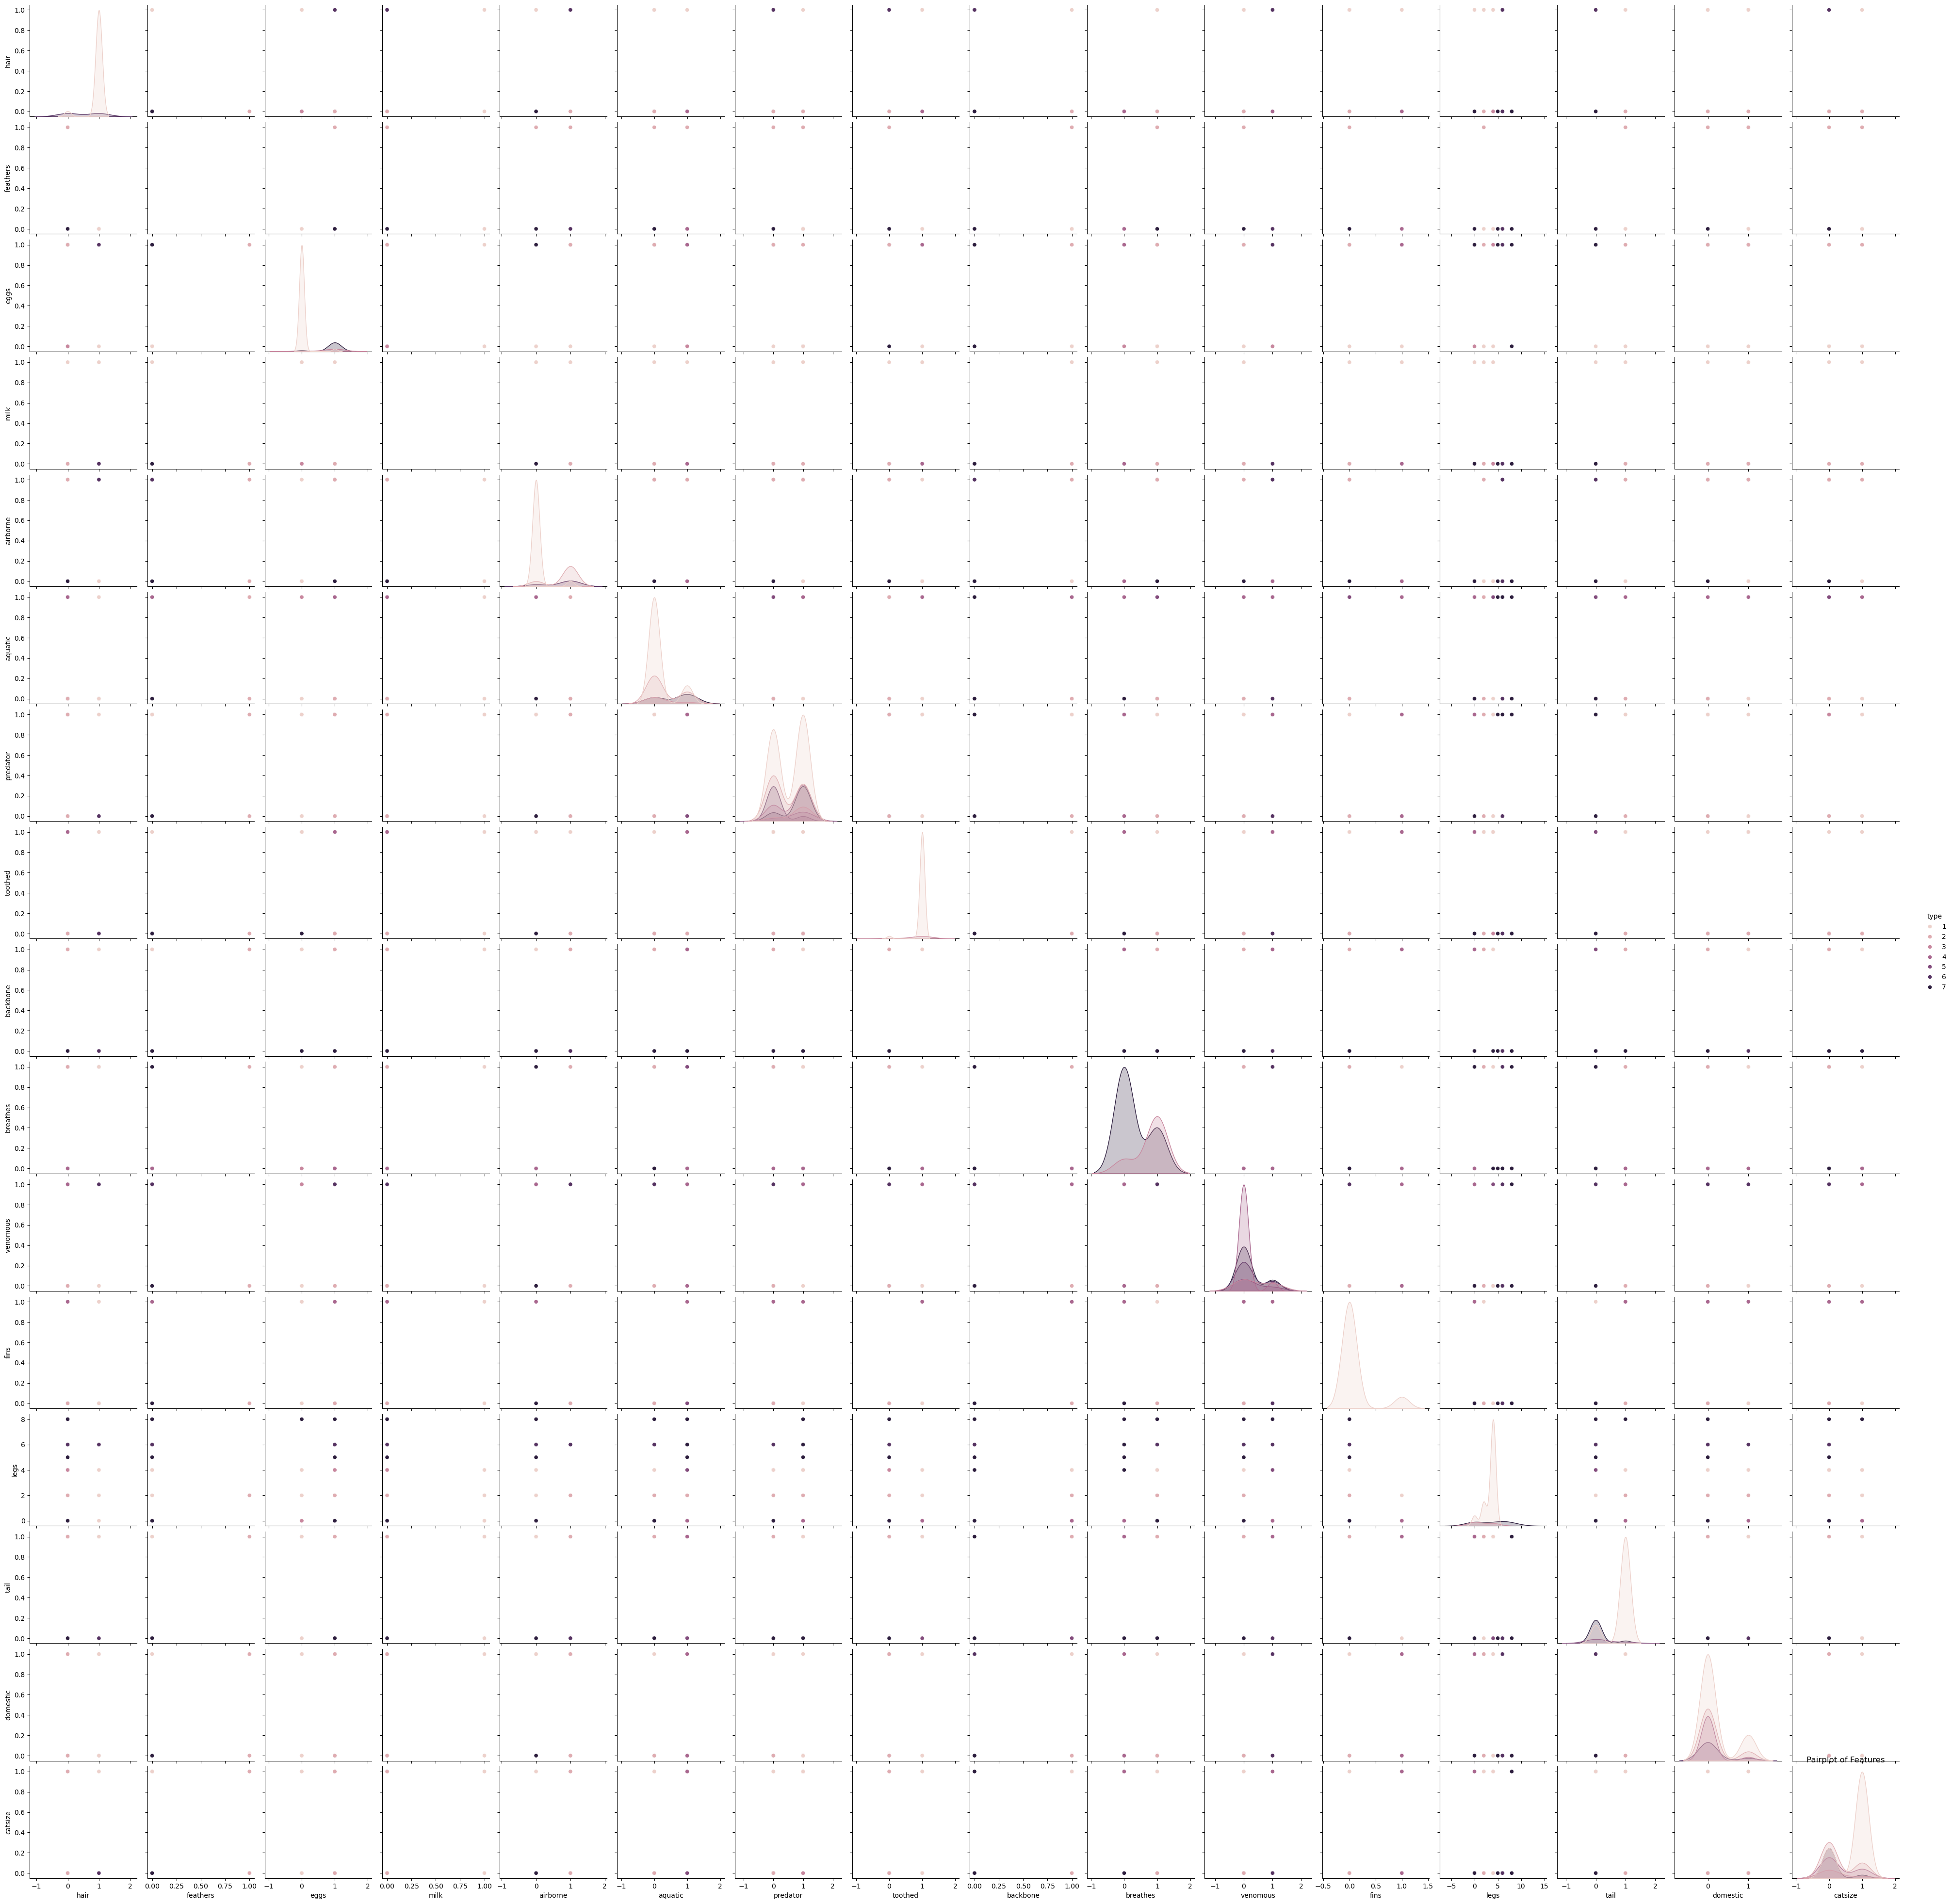

In [39]:
# Histograms for feature distribution
sns.pairplot(df, hue='type')
plt.title('Pairplot of Features')
plt.show()




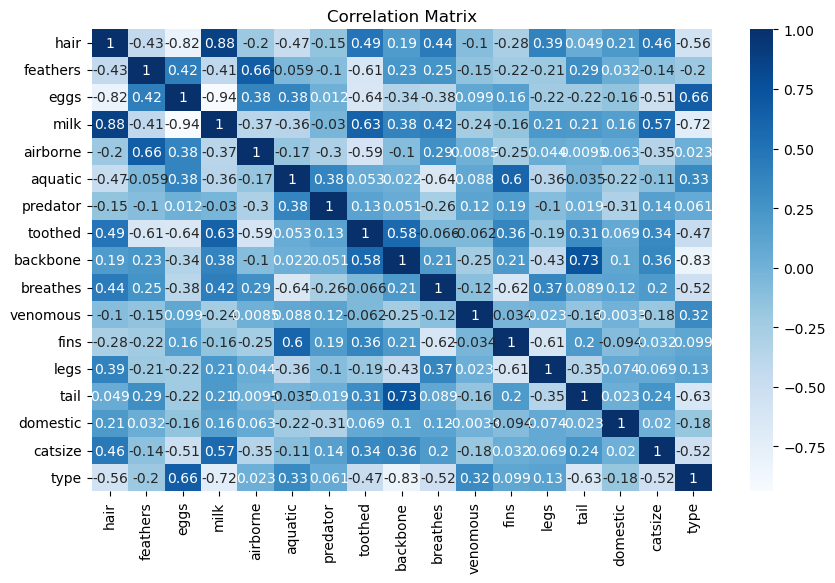

In [40]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## Task 2: Data Preprocessing  

In [42]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('Zoo.csv')

# Check for missing values
print(df.isnull().sum())



animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [43]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Check for outliers
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['legs'] > lower_bound) & (df['legs'] < upper_bound)]



In [44]:
print(df.shape)

(99, 18)


## Task 3 : Split the dataset (Train 80 % & Test 20 %) 

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('Zoo.csv')

# Split data into features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 17) (21, 17) (80,) (21,)


## Task 4: Implementation of K-Nearest Neighbours algorithm 

In [48]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('zoo.csv')

# Print column names
print("Column Names:", list(df.columns))



Column Names: ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [49]:
# Define features (X) and target (y)
target_column = df.columns[-1]  # Assuming the last column is the target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Print target column name
print("Target Column:", target_column)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define numeric and categorical transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_knn = knn_pipeline.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))




Target Column: type
KNN Accuracy: 0.9523809523809523


In [50]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [51]:
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


## Task 5 : Appropriate distance metric and value for K.

In [53]:
# Task 5: Choose an appropriate distance metric and value for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define distance metrics and K values to test
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
K_values = [3, 5, 7, 9]

# Initialize best accuracy and parameters
best_accuracy = 0
best_params = None

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Iterate through distance metrics and K values
for metric in distance_metrics:
    for K in K_values:
        # Define preprocessor
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ]
        )

        # Define KNN classifier
        knn_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('knn', KNeighborsClassifier(n_neighbors=K, metric=metric))
        ])

        # Train the KNN model
        knn_pipeline.fit(X_train, y_train)

        # Evaluate the model
        y_pred = knn_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'metric': metric, 'K': K}

print("Best parameters:", best_params)

Best parameters: {'metric': 'euclidean', 'K': 3}


## Task 6 : Evaluating the classifier's performance 

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Evaluate the KNN model
y_pred_knn = knn_pipeline.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9047619047619048
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21

KNN Confusion Matrix:
[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


## Task 7 : Visualize the decision boundaries of the classifier

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load dataset
df = pd.read_csv('zoo.csv')

# Print column names
print(df.columns)



Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


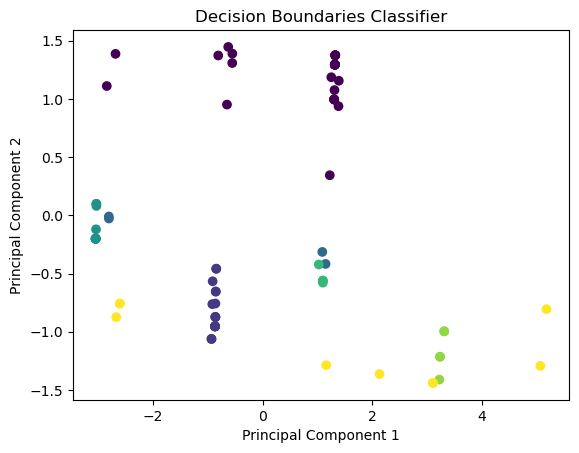

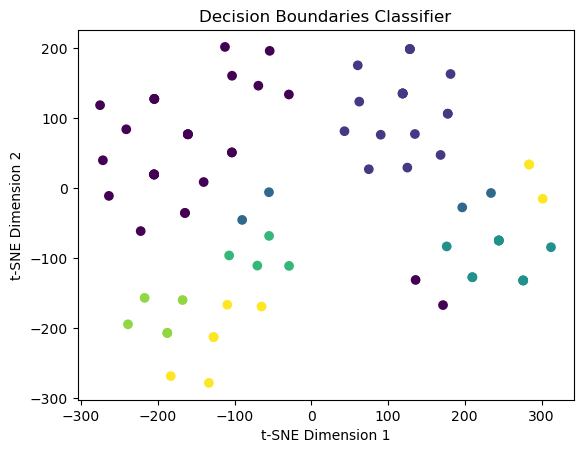

In [58]:
# Define features (X) and target (y)
X = df.drop(['type', 'animal name'], axis=1)  # Drop target column and animal name
y = df['type']

# Convert categorical variables to numerical
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.Categorical(X[col]).codes

# Replace 'yes' and 'no' with 1 and 0
X = X.replace('yes', 1).replace('no', 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaler and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Reduce dimensions using PCA or t-SNE
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_train)

# Alternatively, use t-SNE
tsne = TSNE(n_components=2)
tsne_df = tsne.fit_transform(X_train)

# Plot decision boundaries
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries Classifier')
plt.show()

# Alternatively, plot using t-SNE
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c=y_train)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Decision Boundaries Classifier')
plt.show()

In [71]:
## Interview Question 1:Key Hyperparameters in KNN 

In [ ]:
#Key hyperparameters in KNN
# n_neighbors (K): Number of nearest neighbors to consider.
# weights: Weight function used to compute the nearest neighbors (uniform, distance).
# metric: Distance metric used (euclidean, manhattan, minkowski, etc.).
# algorithm: Algorithm used to compute the nearest neighbors (auto, ball_tree, kd_tree, brute).
# leaf_size: Leaf size of the ball tree or KD tree.

In [60]:


from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=skf)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9620132953466287


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load zoo dataset
df = pd.read_csv('zoo.csv')

# Encode target variable
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Define features (X) and target (y)
X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model with different hyperparameters
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_algorithm = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

# Train models
knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)
knn_algorithm.fit(X_train, y_train)

# Evaluate models
y_pred_uniform = knn_uniform.predict(X_test)
y_pred_distance = knn_distance.predict(X_test)
y_pred_algorithm = knn_algorithm.predict(X_test)

print("Uniform Weights Accuracy:", accuracy_score(y_test, y_pred_uniform))
print("Distance Weights Accuracy:", accuracy_score(y_test, y_pred_distance))
print("Ball Tree Algorithm Accuracy:", accuracy_score(y_test, y_pred_algorithm))

Uniform Weights Accuracy: 0.9047619047619048
Distance Weights Accuracy: 0.9523809523809523
Ball Tree Algorithm Accuracy: 0.9047619047619048


In [62]:
### Interview Question 2: Distance metrixs used in KNN are : 
# Euclidean Distance: Measures the straight-line distance between two points.
# Manhattan Distance (L1): Measures the sum of absolute differences between coordinates.
# Minkowski Distance (Lp): Generalization of Euclidean and Manhattan distances.
# Cosine Distance: Measures the cosine of the angle between two vectors

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load zoo dataset
df = pd.read_csv('zoo.csv')

# Encode target variable
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Define features (X) and target (y)
X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)

# Train models
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)

# Evaluate models
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_minkowski = knn_minkowski.predict(X_test)

print("Euclidean Distance Accuracy:", accuracy_score(y_test, y_pred_euclidean))
print("Manhattan Distance Accuracy:", accuracy_score(y_test, y_pred_manhattan))
print("Minkowski Distance Accuracy:", accuracy_score(y_test, y_pred_minkowski))

Euclidean Distance Accuracy: 0.9047619047619048
Manhattan Distance Accuracy: 0.9523809523809523
Minkowski Distance Accuracy: 0.9047619047619048


In [64]:
### Interview Question 2: Distance metrixs used in KNN (with implementation )

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load zoo dataset
df = pd.read_csv('zoo.csv')

# Check column names
print(df.columns)

# Split data into features (X) and target (y)
X = df.drop(['type'], axis=1)  # Assuming 'type' is the target column
y = df['type']

# Encode categorical variables using OrdinalEncoder
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define distance metrics
metrics = [
    ('euclidean', 'euclidean'),  # Default
    ('manhattan', 'manhattan'),
    ('minkowski', 'minkowski'),  # p=3
    ('cosine', 'cosine')
]

# Train and evaluate KNN models with different distance metrics
for name, metric in metrics:
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=3)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Distance Metric: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0
    print()

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')
Distance Metric: euclidean
Accuracy: 0.38095238095238093
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.67      0.62        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.38        21
   macro avg       0.10      0.11      0.10        21
weighted avg       0.33      0.38      0.35        21


Distance Metric: manhattan
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          